* Análisis del Negocio
* Pregunta a responder (Hipótesis)
* Escenario a desarrollar
* Análisis de variables de negocio
* Entendimiento de los datos
* Proceso ETL (Datos origen)
* Limpieza y Transformación de datos
* Análisis de datos (Estadística Descriptiva)

* Modelado Analítico
* Algoritmo a aplicar
* Parámetros de configuración (si aplica)
* Datos de entrenamiento
* Datos de prueba (si aplica)
* Resultados del modelo o Evaluación
* Consideraciones del modelo
* Beneficios
* Limitaciones
* Supuestos

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.preprocessing import StandardScaler

In [108]:
file_path = r"C:\Users\oscar\OneDrive\Documentos\Dat\Practicas\Sell_out_TAF_Historic_sales_Sell_out_TAF_01-01-2022_12-12-2023.parquet"
df = pd.read_parquet(file_path)

In [109]:
df

,Date,Year,Month,Week_number,Region,Client,Client_Bill_to,Sub_client,ID_store,Department,UPC,MID,Sell_out_pz,Public_price,Sell_out_pp,Sell_out_pp_no_iva,Currency
0,2022-01-01,2022,1,52,México,TAF,1014846,TAF,96004,,886947030863,10531939,1,649.0,649.0,559.482759,Peso
1,2022-01-01,2022,1,52,México,TAF,1014846,TAF,96017,,193648216596,12040614,1,599.0,599.0,516.379310,Peso
2,2022-01-01,2022,1,52,México,TAF,1014846,TAF,96021,,194789394495,12490283,1,599.0,599.0,516.379310,Peso
3,2022-01-01,2022,1,52,México,TAF,1014846,TAF,96026,,190529107332,11357008,1,599.0,599.0,516.379310,Peso
4,2022-01-01,2022,1,52,México,TAF,1014846,TAF,96026,,195600615300,60141879,1,599.0,599.0,516.379310,Peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94577,2023-12-12,2023,12,50,México,TAF,1014846,TRUE KIDS,95032,,196998651260,60364160,1,449.0,449.0,387.068966,Peso
94578,2023-12-12,2023,12,50,México,TAF,1014846,TRUE KIDS,95033,,196998651406,60364149,1,449.0,449.0,387.068966,Peso
94579,2023-12-12,2023,12,50,México,TAF,1014846,TRUE KIDS,95034,,196818722439,60298854,1,449.0,449.0,387.068966,Peso
94580,2023-12-12,2023,12,50,México,TAF,1014846,TRUE KIDS,95034,,196820705574,60345113,1,449.0,449.0,387.068966,Peso


In [110]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Variables predictoras y objetivo
X = df[['Public_price', 'Sell_out_pp', 'Sell_out_pz']]
y = df['Sell_out_pz']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = svr_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.003317416123087744


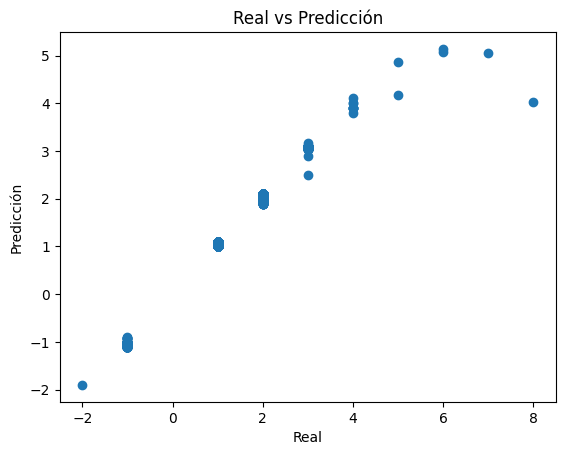

In [111]:
# ver la efecctividad del modelo
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Real vs Predicción')
plt.show()



In [158]:
import pandas as pd
import numpy as np

# Configuración de aleatoriedad para reproducibilidad
np.random.seed(42)

# Número de registros simulados
n = 27000

# Simulación de datos
data = {
    "ID_cliente": range(1, n + 1),
    "Edad": np.random.randint(18, 70, size=n),  # Edad entre 18 y 70 años
    "Genero": np.random.choice(["M", "F"], size=n),  # Género
    "Region": np.random.choice(["Norte", "Sur", "Centro", "Occidente"], size=n),
    "Tipo_cliente": np.random.choice(["Nuevo", "Recurrente", "VIP"], size=n, p=[0.6, 0.3, 0.1]),
    "Frecuencia_compra": np.random.poisson(2, size=n),  # Veces que compra en promedio
    "Monto_total_gastado": np.round(np.random.uniform(50, 5000, size=n), 2),
    "Canal_compra": np.random.choice(["Online", "Fisica", "Movil"], size=n, p=[0.5, 0.4, 0.1]),
    "Metodo_pago": np.random.choice(["Tarjeta", "Efectivo", "PayPal"], size=n),
    "Descuento_aplicado": np.round(np.random.uniform(0, 50, size=n), 2),  # Descuentos en %
    "Tiempo_en_sitio": np.random.exponential(scale=5, size=n),  # Tiempo en minutos
    "Clicks_antes_de_comprar": np.random.randint(1, 20, size=n),
    "Temporada": np.random.choice(["Alta", "Baja"], size=n, p=[0.3, 0.7]),
    "Días_desde_ultima_compra": np.random.randint(0, 90, size=n),  # Hasta 3 meses
}

# Columna objetivo: Probabilidad de abandono (ruido introducido)
prob_abandono = (
    0.4 * (data["Frecuencia_compra"] == 0)
    + 0.2 * (data["Canal_compra"] == "Online")
    + 0.1 * (data["Descuento_aplicado"] > 20)
    + 0.3 * (data["Tiempo_en_sitio"] > 10)
    + np.random.normal(0, 0.1, size=n)  # Ruido
)
#data["Abandono"] = (prob_abandono > 0.5).astype(int)


# Crear el DataFrame
df_retail = pd.DataFrame(data)
df_retail['Abandono'] = np.random.choice([0, 1], size=len(df_retail), p=[0.7, 0.3])  # 70% no abandona, 30% abandona


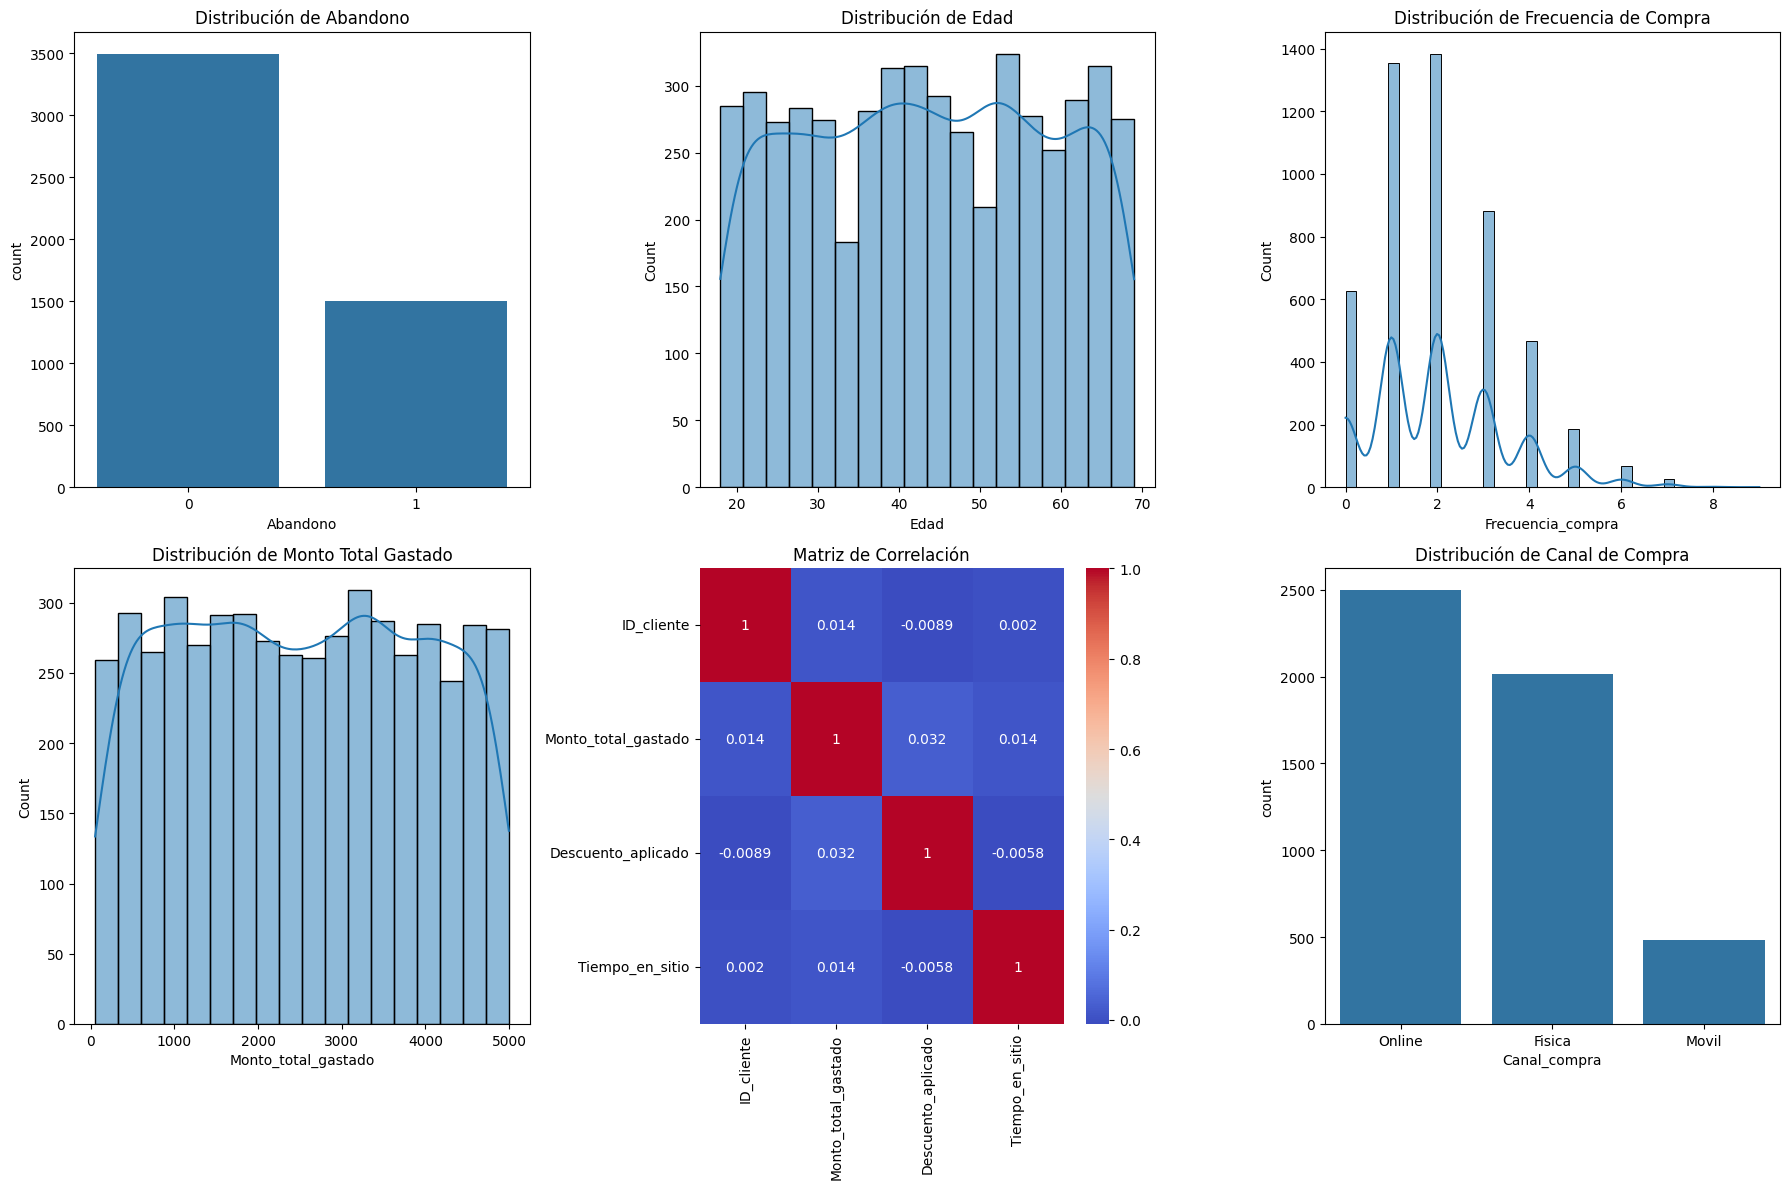

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribución de la variable objetivo (Abandono)
sns.countplot(x="Abandono", data=df_retail, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Abandono')

# 2. Edad
sns.histplot(df_retail["Edad"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Edad')

# 3. Frecuencia de compra
sns.histplot(df_retail["Frecuencia_compra"], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribución de Frecuencia de Compra')

# 4. Monto total gastado
sns.histplot(df_retail["Monto_total_gastado"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Monto Total Gastado')

# 5. Correlación entre variables numéricas
# Seleccionamos solo las columnas numéricas
numeric_columns = df_retail.select_dtypes(include=["float64", "int64"]).columns
corr_matrix = df_retail[numeric_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title('Matriz de Correlación')

# 6. Distribución de los valores categóricos (Canal_compra)
sns.countplot(x="Canal_compra", data=df_retail, ax=axes[1, 2])
axes[1, 2].set_title('Distribución de Canal de Compra')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Balance de clases en 'Abandono':
Abandono
0    18884
1     8116
Name: count, dtype: int64


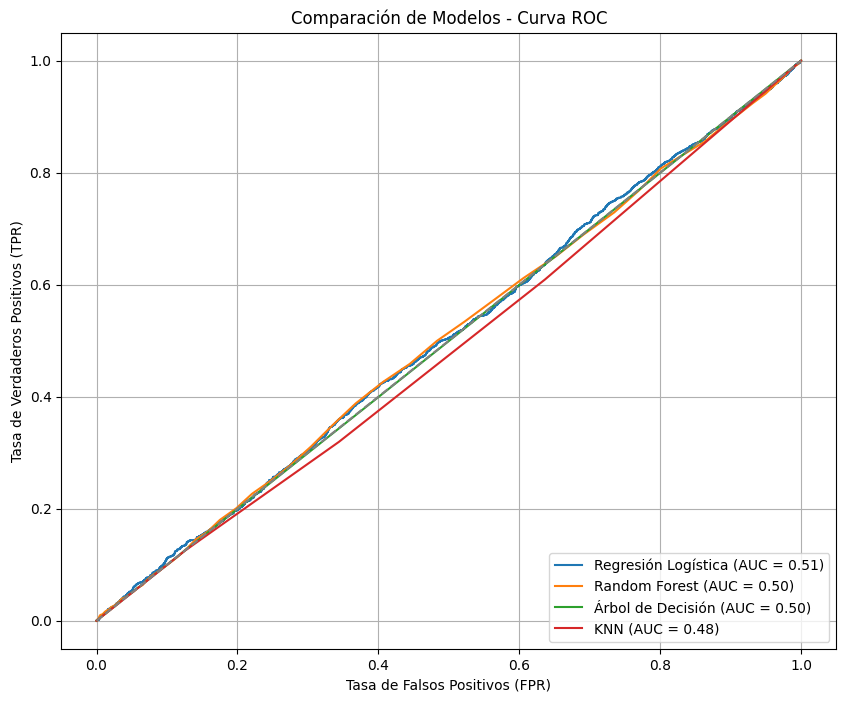

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Convertir variables categóricas a variables ficticias (dummies)
df_retail_dummies = pd.get_dummies(df_retail, drop_first=True)

# Verificar el balance de clases
print(f"Balance de clases en 'Abandono':\n{df_retail['Abandono'].value_counts()}")

# Definir las características (X) y la variable objetivo (y)
X = df_retail_dummies.drop("Abandono", axis=1)
y = df_retail["Abandono"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para balancear las clases (solo en entrenamiento)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Crear un gráfico de subgráficas
plt.figure(figsize=(10, 8))

# Iterar sobre los modelos y calcular la curva ROC para cada uno
for model_name, model in models.items():
    # Entrenar el modelo con las características escaladas
    model.fit(X_train_scaled, y_train_smote)
    
    # Predecir las probabilidades de la clase positiva
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular la curva ROC y el AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar la línea de referencia
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Detalles del gráfico
plt.title('Comparación de Modelos - Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [165]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Establecer la semilla para la reproducibilidad
np.random.seed(42)

# Simulación de datos de clientes
n_samples = 20000
X = pd.DataFrame({
    'Edad': np.random.randint(18, 70, n_samples),
    'Frecuencia_compra': np.random.randint(1, 12, n_samples),
    'Monto_total_gastado': np.random.uniform(50, 5000, n_samples),
    'Descuento_aplicado': np.random.uniform(0, 1, n_samples),
    'Tiempo_en_sitio': np.random.uniform(1, 30, n_samples),
    'Clicks_antes_de_comprar': np.random.randint(1, 10, n_samples),
    'Días_desde_ultima_compra': np.random.randint(1, 100, n_samples)
})

# Variables categóricas
X['Genero'] = np.random.choice(['M', 'F'], size=n_samples)
X['Region'] = np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], size=n_samples)
X['Tipo_cliente'] = np.random.choice(['Nuevo', 'Frecuente'], size=n_samples)
X['Canal_compra'] = np.random.choice(['Online', 'Tienda'], size=n_samples)
X['Metodo_pago'] = np.random.choice(['Tarjeta', 'Efectivo', 'Transferencia'], size=n_samples)
X['Temporada'] = np.random.choice(['Alta', 'Baja'], size=n_samples)

# Variable objetivo: Abandono (0 = no abandona, 1 = abandona)
# Ajustar la probabilidad de abandono con condiciones realistas
X['Abandono'] = np.random.binomial(1, p=0.3, size=n_samples)  # 30% de probabilidad de abandono
X.loc[X['Monto_total_gastado'] > 2000, 'Abandono'] = 1  # Si gastan más de $2000, probablemente abandonan
X.loc[X['Tiempo_en_sitio'] > 20, 'Abandono'] = 1  # Si pasan más de 20 minutos, probablemente abandonan

# Revisar los primeros registros
print(X.head())

# Convertir variables categóricas a variables dummy (si es necesario)
X_dummies = pd.get_dummies(X, drop_first=True)

# Definir X y y
y = X['Abandono']
X = X_dummies.drop('Abandono', axis=1)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   Edad  Frecuencia_compra  Monto_total_gastado  Descuento_aplicado  \
0    56                  1          4135.473225            0.467815   
1    69                  7           925.719730            0.446723   
2    46                  3          3154.752409            0.678937   
3    32                  1          2921.851850            0.850153   
4    60                  8          1734.872589            0.491683   

   Tiempo_en_sitio  Clicks_antes_de_comprar  Días_desde_ultima_compra Genero  \
0        15.065982                        6                        93      F   
1         8.625864                        5                        70      F   
2         9.692838                        2                         1      M   
3         8.642581                        3                        29      F   
4        18.528812                        4                         5      F   

  Region Tipo_cliente Canal_compra    Metodo_pago Temporada  Abandono  
0  Oeste    Frecuent

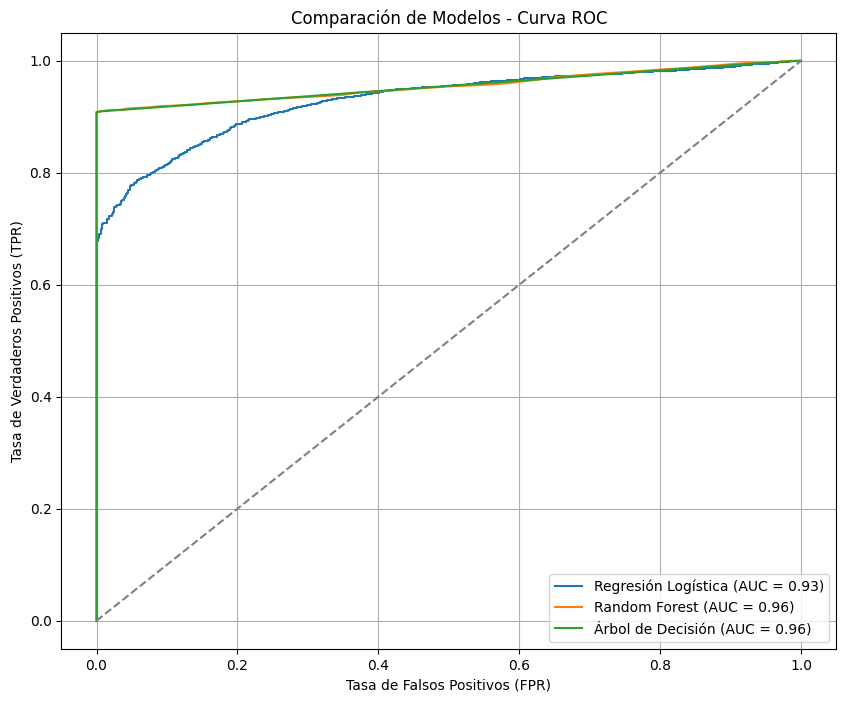

In [166]:
# Definir los modelos con algunos ajustes
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
}

# Crear un gráfico de subgráficas
plt.figure(figsize=(10, 8))

# Iterar sobre los modelos y calcular la curva ROC para cada uno
for model_name, model in models.items():
    # Entrenar el modelo con las características escaladas
    model.fit(X_train_scaled, y_train)
    
    # Predecir las probabilidades de la clase positiva
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular la curva ROC y el AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar la línea de referencia
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Detalles del gráfico
plt.title('Comparación de Modelos - Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [171]:
# Configuración inicial
n_samples = 5000
n_clients = 1000  # Cantidad de clientes únicos

# Generar IDs de clientes (1000 clientes repetidos)
client_ids = np.random.choice(range(1, n_clients+1), n_samples)

# Simular las características con más variabilidad (mismo cliente con comportamientos diferentes)
X = pd.DataFrame({
    'ID_cliente': client_ids,
    'Edad': np.random.randint(18, 70, n_samples),
    'Frecuencia_compra': np.random.randint(1, 12, n_samples),
    'Monto_total_gastado': np.random.uniform(50, 5000, n_samples),
    'Descuento_aplicado': np.random.uniform(0, 1, n_samples),
    'Tiempo_en_sitio': np.random.uniform(1, 30, n_samples),
    'Clicks_antes_de_comprar': np.random.randint(1, 10, n_samples),
    'Días_desde_ultima_compra': np.random.randint(1, 100, n_samples)
})

# Introducir el 'Abandono' de manera más controlada
X['Abandono'] = np.random.binomial(1, p=0.2, size=n_samples)  # Reducir probabilidad de abandono
X.loc[X['Monto_total_gastado'] > 2500, 'Abandono'] = np.random.binomial(1, p=0.4, size=X[X['Monto_total_gastado'] > 2500].shape[0])  # Relación débil
X.loc[X['Frecuencia_compra'] > 8, 'Abandono'] = np.random.binomial(1, p=0.3, size=X[X['Frecuencia_compra'] > 8].shape[0])  # Relación débil

# Ver las primeras filas para asegurar variabilidad
print(X.head())


   ID_cliente  Edad  Frecuencia_compra  Monto_total_gastado  \
0         346    30                  1          4490.246023   
1         532    19                  5          1908.622816   
2         642    41                  5          3995.050929   
3         915    19                  8          2295.155603   
4         133    25                 10          3978.692313   

   Descuento_aplicado  Tiempo_en_sitio  Clicks_antes_de_comprar  \
0            0.513508        12.690319                        3   
1            0.283765         9.934776                        7   
2            0.564409         8.793909                        9   
3            0.894313         5.777590                        1   
4            0.966568        28.041626                        6   

   Días_desde_ultima_compra  Abandono  
0                        24         0  
1                        98         0  
2                        98         0  
3                        60         0  
4                 

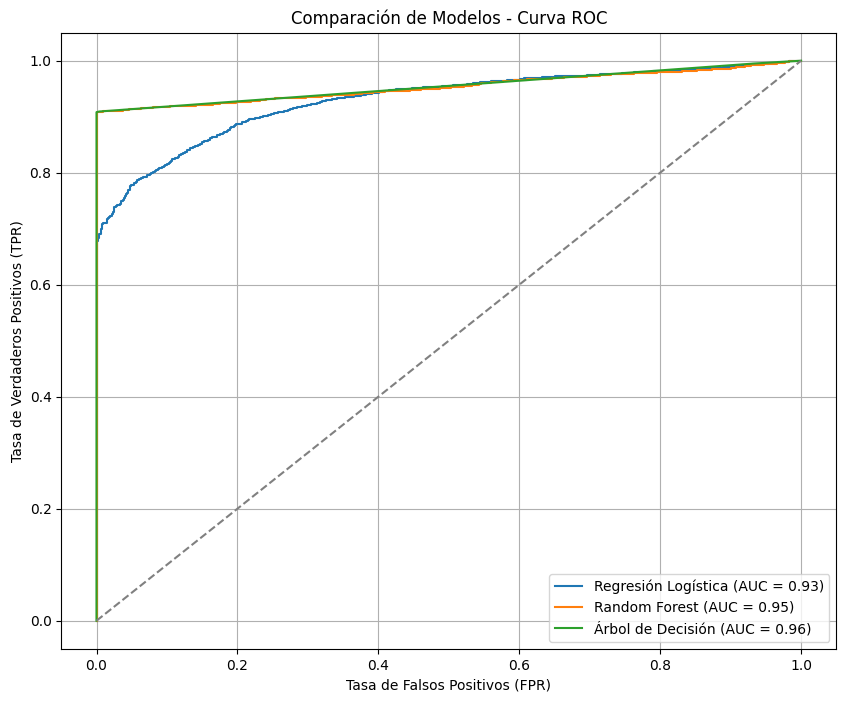

In [172]:
# Definir los modelos con ajustes para mayor generalización
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5),  # Regularización con C
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, min_samples_split=10, class_weight='balanced', random_state=42),
}

# Crear un gráfico de subgráficas
plt.figure(figsize=(10, 8))

# Iterar sobre los modelos y calcular la curva ROC para cada uno
for model_name, model in models.items():
    # Entrenar el modelo con las características escaladas
    model.fit(X_train_scaled, y_train)
    
    # Predecir las probabilidades de la clase positiva
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular la curva ROC y el AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar la línea de referencia
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Detalles del gráfico
plt.title('Comparación de Modelos - Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)

# Mostrar el gráfico
plt.show()


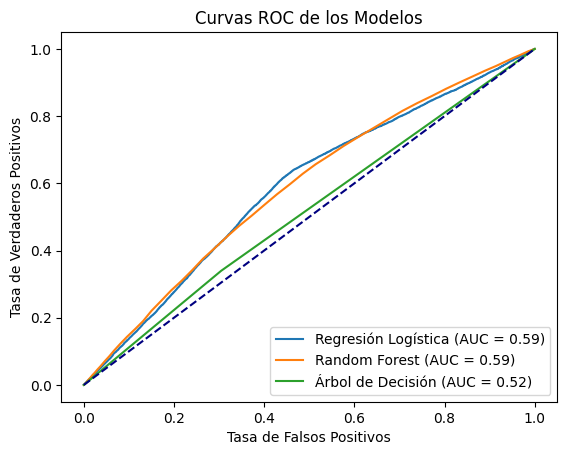

AUC para cada modelo:
Regresión Logística: 0.59
Random Forest: 0.59
Árbol de Decisión: 0.52


In [178]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Simulación de datos ajustados con comportamientos realistas
n_samples = 200000
n_clients = 700  # Número de clientes únicos

# Generación de IDs de clientes repetidos
client_ids = np.random.choice(range(1, n_clients+1), n_samples)

# Simulación de variables numéricas
X = pd.DataFrame({
    'ID_cliente': client_ids,
    'Edad': np.random.randint(18, 70, n_samples),
    'Frecuencia_compra': np.random.randint(1, 12, n_samples),
    'Monto_total_gastado': np.random.uniform(50, 5000, n_samples),
    'Descuento_aplicado': np.random.uniform(0, 1, n_samples),
    'Tiempo_en_sitio': np.random.uniform(1, 30, n_samples),
    'Clicks_antes_de_comprar': np.random.randint(1, 10, n_samples),
    'Días_desde_ultima_compra': np.random.randint(1, 100, n_samples)
})

# Generación de la variable de abandono (más realista)
X['Abandono'] = np.random.binomial(1, p=0.2, size=n_samples)
X.loc[X['Monto_total_gastado'] > 2500, 'Abandono'] = np.random.binomial(1, p=0.4, size=X[X['Monto_total_gastado'] > 2500].shape[0])
X.loc[X['Frecuencia_compra'] > 8, 'Abandono'] = np.random.binomial(1, p=0.3, size=X[X['Frecuencia_compra'] > 8].shape[0])

# Separación de variables predictoras y la variable objetivo
X_features = X.drop(columns=['Abandono', 'ID_cliente'])  # Variables predictoras
y = X['Abandono']  # Variable objetivo

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

# Normalización de las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos a entrenar
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

# Ajuste y evaluación de los modelos
roc_auc_scores = {}
for model_name, model in models.items():
    # Entrenamiento del modelo
    model.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase positiva
    
    # Cálculo del AUC
    auc_score = roc_auc_score(y_test, y_pred_prob)
    roc_auc_scores[model_name] = auc_score

    # Curvas ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Configuración final del gráfico
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Línea diagonal (random classifier)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de los Modelos')
plt.legend(loc='lower right')
plt.show()

# Resultados del AUC para cada modelo
print("AUC para cada modelo:")
for model_name, auc_score in roc_auc_scores.items():
    print(f"{model_name}: {auc_score:.2f}")


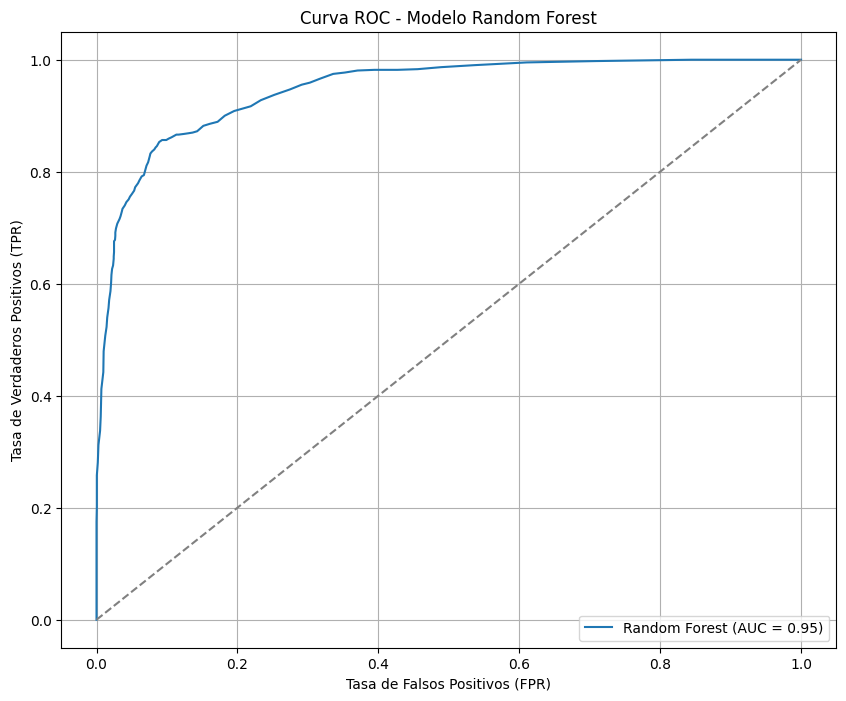

AUC: 0.95


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(42)
n_samples = 10000

# Simulación de datos
data = {
    'Edad': np.random.randint(18, 70, n_samples),
    'Genero': np.random.choice(['M', 'F'], n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Centro', 'Occidente'], n_samples),
    'Frecuencia_compra': np.random.poisson(2, n_samples),
    'Monto_total_gastado': np.round(np.random.uniform(50, 5000, n_samples), 2),
    'Canal_compra': np.random.choice(['Online', 'Fisica', 'Movil'], n_samples),
    'Metodo_pago': np.random.choice(['Tarjeta', 'Efectivo', 'PayPal'], n_samples),
    'Descuento_aplicado': np.round(np.random.uniform(0, 50, n_samples), 2),
    'Tiempo_en_sitio': np.random.exponential(5, n_samples),  # Corregido
    'Clicks_antes_de_comprar': np.random.randint(1, 20, n_samples),
    'Temporada': np.random.choice(['Alta', 'Baja'], n_samples),
    'Días_desde_ultima_compra': np.random.randint(0, 90, n_samples),
}

# Columna objetivo: Compra (1 = sí, 0 = no)
prob_compra = (
    0.3 * (data['Frecuencia_compra'] > 1) +
    0.2 * (data['Canal_compra'] == 'Online') +
    0.1 * (data['Descuento_aplicado'] > 20) +
    0.4 * (data['Tiempo_en_sitio'] > 10) +
    np.random.normal(0, 0.1, n_samples)
)
data['Compra'] = (prob_compra > 0.5).astype(int)

# Crear el DataFrame
df_ecommerce = pd.DataFrame(data)

# Convertir variables categóricas a variables ficticias (dummies)
df_ecommerce_dummies = pd.get_dummies(df_ecommerce, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_ecommerce_dummies.drop('Compra', axis=1)
y = df_ecommerce['Compra']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir las probabilidades de la clase positiva
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC - Modelo Random Forest')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Mostrar el AUC
print(f'AUC: {roc_auc:.2f}')

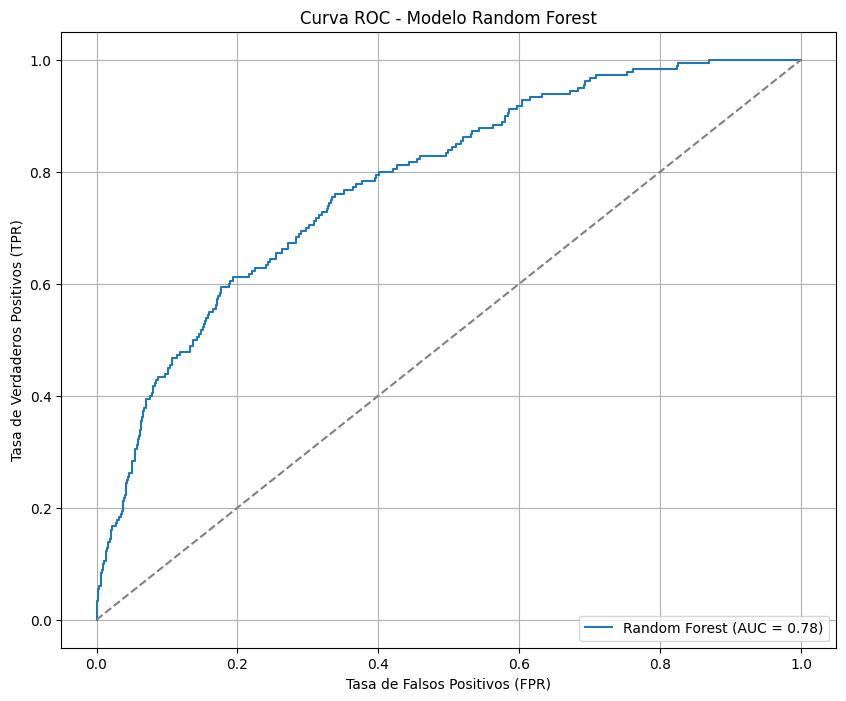

AUC: 0.78


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(42)
n_samples = 10000

# Simulación de datos
data = {
    'Edad': np.random.randint(18, 70, n_samples),
    'Genero': np.random.choice(['M', 'F'], n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Centro', 'Occidente'], n_samples),
    'Frecuencia_compra': np.random.poisson(2, n_samples),
    'Monto_total_gastado': np.round(np.random.uniform(50, 5000, n_samples), 2),
    'Canal_compra': np.random.choice(['Online', 'Fisica', 'Movil'], n_samples),
    'Metodo_pago': np.random.choice(['Tarjeta', 'Efectivo', 'PayPal'], n_samples),
    'Descuento_aplicado': np.round(np.random.uniform(0, 50, n_samples), 2),
    'Tiempo_en_sitio': np.random.exponential(5, n_samples),
    'Clicks_antes_de_comprar': np.random.randint(1, 20, n_samples),
    'Temporada': np.random.choice(['Alta', 'Baja'], n_samples),
    'Días_desde_ultima_compra': np.random.randint(0, 90, n_samples),
}

# Modificar cálculo de la variable objetivo 'Compra' para hacerla más realista
prob_compra = (
    0.1 * (data['Frecuencia_compra'] > 1) +     # Reducido el peso
    0.1 * (data['Canal_compra'] == 'Online') +   # Reducido el peso
    0.05 * (data['Descuento_aplicado'] > 20) +   # Reducido el peso
    0.2 * (data['Tiempo_en_sitio'] > 10) +       # Reducido el peso
    np.random.normal(0, 0.2, n_samples)           # Aumentado el ruido
)
data['Compra'] = (prob_compra > 0.5).astype(int)

# Crear el DataFrame
df_ecommerce = pd.DataFrame(data)

# Introducir más ruido en las características
data['Monto_total_gastado'] += np.random.normal(0, 200, n_samples)  # Añadir ruido a los montos gastados
data['Tiempo_en_sitio'] += np.random.normal(0, 2, n_samples)  # Añadir ruido al tiempo en sitio

# Convertir variables categóricas a variables ficticias (dummies)
df_ecommerce_dummies = pd.get_dummies(df_ecommerce, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_ecommerce_dummies.drop('Compra', axis=1)
y = df_ecommerce['Compra']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo con parámetros ajustados
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir las probabilidades de la clase positiva
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC - Modelo Random Forest')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Mostrar el AUC
print(f'AUC: {roc_auc:.2f}')


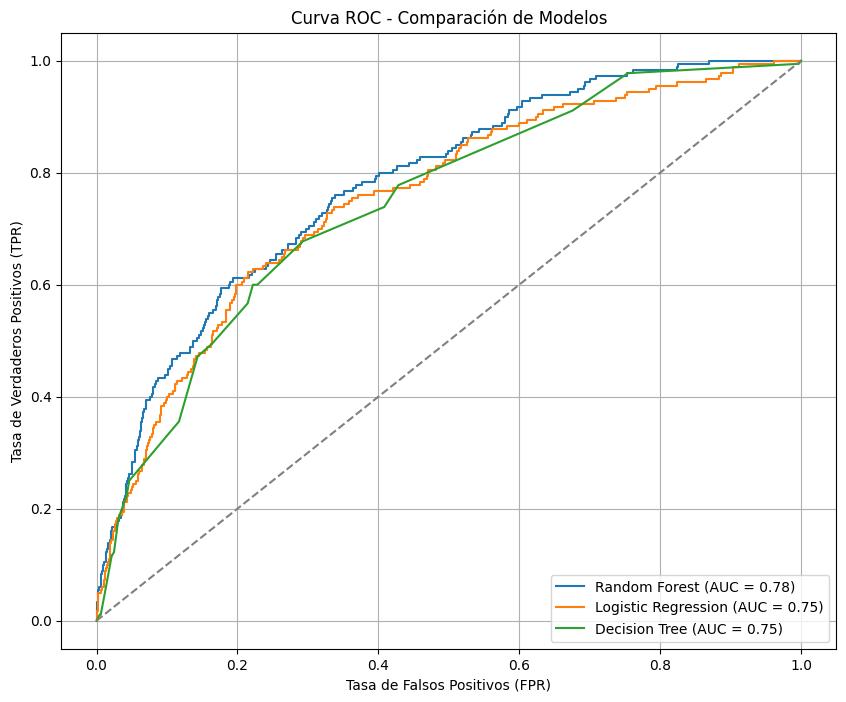

Random Forest - AUC: 0.78
Logistic Regression - AUC: 0.75
Decision Tree - AUC: 0.75


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(42)
n_samples = 10000

# Simulación de datos
data = {
    'Edad': np.random.randint(18, 70, n_samples),
    'Genero': np.random.choice(['M', 'F'], n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Centro', 'Occidente'], n_samples),
    'Frecuencia_compra': np.random.poisson(2, n_samples),
    'Monto_total_gastado': np.round(np.random.uniform(50, 5000, n_samples), 2),
    'Canal_compra': np.random.choice(['Online', 'Fisica', 'Movil'], n_samples),
    'Metodo_pago': np.random.choice(['Tarjeta', 'Efectivo', 'PayPal'], n_samples),
    'Descuento_aplicado': np.round(np.random.uniform(0, 50, n_samples), 2),
    'Tiempo_en_sitio': np.random.exponential(5, n_samples),
    'Clicks_antes_de_comprar': np.random.randint(1, 20, n_samples),
    'Temporada': np.random.choice(['Alta', 'Baja'], n_samples),
    'Días_desde_ultima_compra': np.random.randint(0, 90, n_samples),
}

# Modificar cálculo de la variable objetivo 'Compra' para hacerla más realista
prob_compra = (
    0.1 * (data['Frecuencia_compra'] > 1) +     # Reducido el peso
    0.1 * (data['Canal_compra'] == 'Online') +   # Reducido el peso
    0.05 * (data['Descuento_aplicado'] > 20) +   # Reducido el peso
    0.2 * (data['Tiempo_en_sitio'] > 10) +       # Reducido el peso
    np.random.normal(0, 0.2, n_samples)           # Aumentado el ruido
)
data['Compra'] = (prob_compra > 0.5).astype(int)

# Crear el DataFrame
df_ecommerce = pd.DataFrame(data)

# Introducir más ruido en las características
data['Monto_total_gastado'] += np.random.normal(0, 200, n_samples)  # Añadir ruido a los montos gastados
data['Tiempo_en_sitio'] += np.random.normal(0, 2, n_samples)  # Añadir ruido al tiempo en sitio

# Convertir variables categóricas a variables ficticias (dummies)
df_ecommerce_dummies = pd.get_dummies(df_ecommerce, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_ecommerce_dummies.drop('Compra', axis=1)
y = df_ecommerce['Compra']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
}

# Crear la figura para la curva ROC
plt.figure(figsize=(10, 8))

# Evaluar cada modelo
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    
    # Predecir las probabilidades de la clase positiva
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular la curva ROC y el AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC para el modelo
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Añadir la línea diagonal (sin discriminación)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Configurar el gráfico
plt.title('Curva ROC - Comparación de Modelos')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Mostrar los AUC de los modelos
for model_name, model in models.items():
    # Predecir las probabilidades de la clase positiva
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f'{model_name} - AUC: {roc_auc:.2f}')


Mejores parámetros de Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Mejores parámetros de Árbol de Decisión: {'max_depth': 10, 'min_samples_split': 10}


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

Mejores parámetros de Regresión Logística: {'C': 0.1, 'penalty': 'l2'}


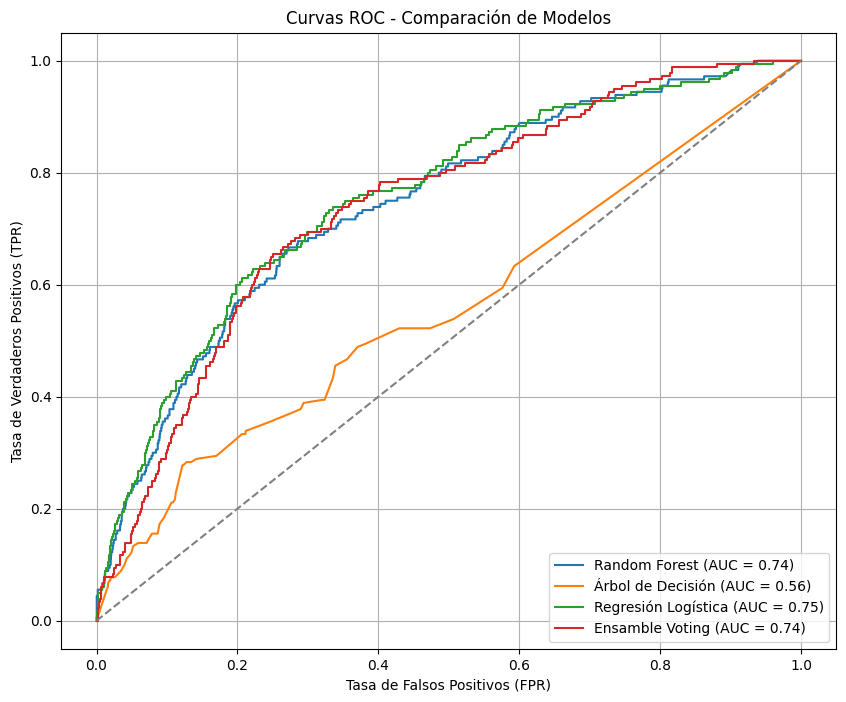

AUC Random Forest: 0.74
AUC Árbol de Decisión: 0.56
AUC Regresión Logística: 0.75
AUC Voting Classifier: 0.74


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Definir los modelos
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Realizar una búsqueda de cuadrícula (GridSearch) para ajustar hiperparámetros de RandomForest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)
print(f"Mejores parámetros de Random Forest: {rf_grid_search.best_params_}")

# Realizar una búsqueda de cuadrícula para el Árbol de Decisión
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=3, n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)
print(f"Mejores parámetros de Árbol de Decisión: {dt_grid_search.best_params_}")

# Realizar una búsqueda de cuadrícula para la Regresión Logística
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=3, n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train)
print(f"Mejores parámetros de Regresión Logística: {lr_grid_search.best_params_}")

# Crear un clasificador de votación para combinar los modelos ajustados
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_grid_search.best_estimator_),
    ('dt', dt_grid_search.best_estimator_),
    ('lr', lr_grid_search.best_estimator_),
], voting='soft')

# Entrenar el VotingClassifier
voting_clf.fit(X_train_scaled, y_train)

# Predecir probabilidades para todos los modelos
y_probs_rf = rf_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
y_probs_dt = dt_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
y_probs_lr = lr_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
y_probs_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Calcular AUC para cada modelo
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_probs_voting)

# Calcular AUC para cada modelo
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Graficar curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Árbol de Decisión (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_voting, tpr_voting, label=f'Ensamble Voting (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curvas ROC - Comparación de Modelos')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Imprimir AUC
print(f"AUC Random Forest: {roc_auc_rf:.2f}")
print(f"AUC Árbol de Decisión: {roc_auc_dt:.2f}")
print(f"AUC Regresión Logística: {roc_auc_lr:.2f}")
print(f"AUC Voting Classifier: {roc_auc_voting:.2f}")


In [19]:
import numpy as np
import pandas as pd

# Configuración inicial
np.random.seed(42)
n_samples = 83827

# Simulación de datos
data = {
    'Edad': np.random.randint(18, 70, n_samples),
    'Genero': np.random.choice(['M', 'F'], n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Centro', 'Occidente'], n_samples),
    'Monto_carrito': np.random.exponential(150, n_samples),  # Carritos más altos tienen mayor abandono
    'Productos_carrito': np.random.randint(1, 30, n_samples),  # Número de productos en el carrito
    'Descuento': np.random.choice([0, 10, 20, 30], n_samples, p=[0.5, 0.3, 0.15, 0.05]),
    'Tiempo_navegacion': np.random.normal(5, 2, n_samples),  # Tiempo en minutos
    'Disponibilidad_stock': np.random.choice([1, 0], n_samples, p=[0.95, 0.05]),  # 1: En stock, 0: Fuera de stock
    'Dispositivo': np.random.choice(['Desktop', 'Mobile', 'Tablet'], n_samples, p=[0.4, 0.5, 0.1]),
    'Categoria_producto': np.random.choice(['Esencial', 'Big item', 'Electronico', 'Jugueteria', 'Perecederos', 'Higiene', 'Licores'], n_samples),
    'Hora_dia': np.random.choice(['Mañana', 'Tarde', 'Noche'], n_samples, p=[0.3, 0.4, 0.3]),
}

# Lógica de probabilidad de abandono
prob_abandono = (
    0.3 * (data['Monto_carrito'] > 300) +                 # Montos altos aumentan la probabilidad
    0.2 * (data['Productos_carrito'] > 10) +             # Muchos productos aumentan la probabilidad
    0.25 * (data['Descuento'] == 0) +                    # Falta de descuento aumenta abandono
    0.35 * (data['Disponibilidad_stock'] == 0) +         # Falta de stock casi siempre causa abandono
    0.15 * (data['Dispositivo'] == 'Mobile') +           # Usuarios móviles tienen mayor abandono
    0.1 * (data['Categoria_producto'] == 'Big item') +   # Productos grandes (Big item) tienen mayor probabilidad
    0.1 * (data['Categoria_producto'] == 'Licores') +    # Productos como licores generan mayor indecisión
    0.05 * (data['Hora_dia'] == 'Noche') +               # Compras nocturnas tienen mayor abandono
    np.random.normal(0, 0.1, n_samples)                  # Ruido aleatorio para variabilidad
)

# Generar la variable objetivo: 1 (abandono) o 0 (compra completada)
data['Abandono'] = (prob_abandono > 0.5).astype(int)

# Crear el DataFrame
df_ecommerce = pd.DataFrame(data)

# Redondear columnas relevantes
df_ecommerce['Monto_carrito'] = df_ecommerce['Monto_carrito'].round(2)
df_ecommerce['Tiempo_navegacion'] = df_ecommerce['Tiempo_navegacion'].clip(0).round(2)  # Evitar tiempos negativos

# Verificar distribución de la variable objetivo
print(df_ecommerce['Abandono'].value_counts(normalize=True))  # Balance de la variable objetivo
df_ecommerce.head()


Abandono
0    0.6198
1    0.3802
Name: proportion, dtype: float64


,Edad,Genero,Region,Monto_carrito,Productos_carrito,Descuento,Tiempo_navegacion,Disponibilidad_stock,Dispositivo,Categoria_producto,Hora_dia,Abandono
0,56,F,Norte,100.64,16,0,5.77,1,Desktop,Licores,Tarde,1
1,69,F,Occidente,169.07,8,10,2.29,1,Mobile,Big item,Tarde,0
2,46,F,Centro,14.40,14,0,6.27,1,Desktop,Perecederos,Tarde,0
3,32,M,Occidente,51.12,9,0,5.67,1,Mobile,Perecederos,Mañana,0
4,60,F,Centro,8.09,24,0,6.45,1,Mobile,Perecederos,Tarde,1


Distribución de la variable objetivo (Abandono):
Abandono
0    0.6198
1    0.3802
Name: proportion, dtype: float64
Reporte de clasificación (Voting Classifier):
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     15587
           1       0.85      0.78      0.82      9562

    accuracy                           0.87     25149
   macro avg       0.86      0.85      0.86     25149
weighted avg       0.87      0.87      0.87     25149

Matriz de confusión:
[[14312  1275]
 [ 2062  7500]]


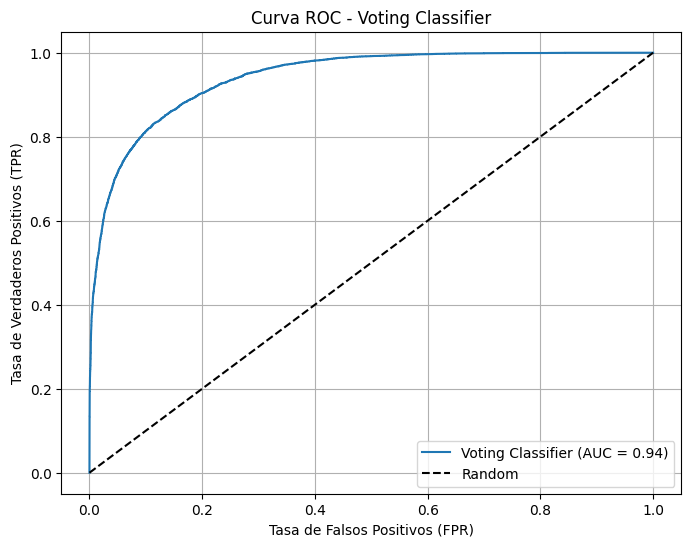

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Configuración inicial
np.random.seed(42)
n_samples = 83827

# Simulación de datos
data = {
    'Edad': np.random.randint(18, 70, n_samples),
    'Genero': np.random.choice(['M', 'F'], n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Centro', 'Occidente'], n_samples),
    'Monto_carrito': np.random.exponential(150, n_samples),
    'Productos_carrito': np.random.randint(1, 30, n_samples),
    'Descuento': np.random.choice([0, 10, 20, 30], n_samples, p=[0.5, 0.3, 0.15, 0.05]),
    'Tiempo_navegacion': np.random.normal(5, 2, n_samples),
    'Disponibilidad_stock': np.random.choice([1, 0], n_samples, p=[0.95, 0.05]),
    'Dispositivo': np.random.choice(['Desktop', 'Mobile', 'Tablet'], n_samples, p=[0.4, 0.5, 0.1]),
    'Categoria_producto': np.random.choice(['Esencial', 'Big item', 'Electronico', 'Jugueteria', 'Perecederos', 'Higiene', 'Licores'], n_samples),
    'Hora_dia': np.random.choice(['Mañana', 'Tarde', 'Noche'], n_samples, p=[0.3, 0.4, 0.3]),
}

# Lógica de probabilidad de abandono
prob_abandono = (
    0.3 * (data['Monto_carrito'] > 300) +
    0.2 * (data['Productos_carrito'] > 10) +
    0.25 * (data['Descuento'] == 0) +
    0.35 * (data['Disponibilidad_stock'] == 0) +
    0.15 * (data['Dispositivo'] == 'Mobile') +
    0.1 * (data['Categoria_producto'] == 'Big item') +
    0.1 * (data['Categoria_producto'] == 'Licores') +
    0.05 * (data['Hora_dia'] == 'Noche') +
    np.random.normal(0, 0.1, n_samples)
)

# Generar la variable objetivo: 1 (abandono) o 0 (compra completada)
data['Abandono'] = (prob_abandono > 0.5).astype(int)

# Crear el DataFrame
df_ecommerce = pd.DataFrame(data)

# Redondear columnas relevantes
df_ecommerce['Monto_carrito'] = df_ecommerce['Monto_carrito'].round(2)
df_ecommerce['Tiempo_navegacion'] = df_ecommerce['Tiempo_navegacion'].clip(0).round(2)

# Verificar distribución de la variable objetivo
print("Distribución de la variable objetivo (Abandono):")
print(df_ecommerce['Abandono'].value_counts(normalize=True))

# Convertir variables categóricas en dummies
df_ecommerce = pd.get_dummies(df_ecommerce, columns=['Genero', 'Region', 'Dispositivo', 'Categoria_producto', 'Hora_dia'], drop_first=True)

# Separar características (X) y objetivo (y)
X = df_ecommerce.drop('Abandono', axis=1)
y = df_ecommerce['Abandono']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear el pipeline de preprocesamiento
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Escalar las características
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Modelos base
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, solver='liblinear')

# GridSearch para Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)

# GridSearch para Árbol de Decisión
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=3, n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)

# GridSearch para Regresión Logística
lr_param_grid = {
    'C': [0.1, 1],
    'penalty': ['l1', 'l2'],
}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=3, n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_grid_search.best_estimator_),
    ('dt', dt_grid_search.best_estimator_),
    ('lr', lr_grid_search.best_estimator_),
], voting='soft')

voting_clf.fit(X_train_scaled, y_train)

# Predicción
y_probs_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluación
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_probs_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Métricas adicionales
print("Reporte de clasificación (Voting Classifier):")
print(classification_report(y_test, y_pred_voting))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_voting))

# Gráfica ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Voting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [112]:
import numpy as np
import pandas as pd
# ignorar wearnings
import warnings
warnings.filterwarnings('ignore')


# Número de muestras
n_samples = 50000

# Generación de datos simulados
data = {
    'Edad': np.random.randint(18, 70, n_samples),
    'Genero': np.random.choice(['M', 'F'], n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Centro', 'Occidente'], n_samples),
    
    # Monto_carrito: ahora más disperso con rango amplio
    'Monto_carrito': np.random.choice(
        np.concatenate([np.random.exponential(700, n_samples), np.random.uniform(1000, 5000, n_samples)]), 
        size=n_samples
    ),
    
    # Productos_carrito: mayor rango de productos
    'Productos_carrito': np.random.randint(1, 50, n_samples),
    
    # Descuento: mayor variabilidad entre 10% y 40%
    'Descuento': np.random.choice([10, 20, 30, 40], n_samples, p=[0.3, 0.3, 0.2, 0.2]),
    
    # Tiempo_navegacion: más disperso
    'Tiempo_navegacion': np.random.normal(8, 4, n_samples),
    
    # Disponibilidad_stock: más incertidumbre
    'Disponibilidad_stock': np.random.choice([1, 0], n_samples, p=[0.8, 0.2]),
    
    # Dispositivo: mayor variabilidad
    'Dispositivo': np.random.choice(['Desktop', 'Mobile', 'Tablet'], n_samples, p=[0.4, 0.4, 0.2]),
    
    # Categoría de Producto: mayor variabilidad en categorías
    'Categoria_producto': np.random.choice(
        ['Esencial', 'Big item', 'Electronico', 'Jugueteria', 'Perecederos', 'Higiene', 'Licores'], 
        n_samples, 
        p=[0.15, 0.1, 0.2, 0.1, 0.1, 0.15, 0.2]
    ),
    
    # Hora_dia: más variabilidad en el horario
    'Hora_dia': np.random.choice(['Mañana', 'Tarde', 'Noche'], n_samples, p=[0.3, 0.4, 0.3]),
}

# Crear DataFrame con los datos generados
df_ecommerce = pd.DataFrame(data)

# Lógica de probabilidad de abandono (con ruido)
prob_abandono = (
    0.3 * (df_ecommerce['Monto_carrito'] > 300) +  # Montos altos aumentan la probabilidad
    0.2 * (df_ecommerce['Productos_carrito'] > 10) +  # Muchos productos aumentan la probabilidad
    0.25 * (df_ecommerce['Descuento'] == 0) +  # Falta de descuento aumenta abandono
    0.35 * (df_ecommerce['Disponibilidad_stock'] == 0) +  # Falta de stock causa abandono
    0.15 * (df_ecommerce['Dispositivo'] == 'Mobile') +  # Móviles tienen mayor abandono
    0.1 * (df_ecommerce['Categoria_producto'] == 'Big item') +  # Productos grandes aumentan probabilidad
    0.1 * (df_ecommerce['Categoria_producto'] == 'Licores') +  # Licores generan indecisión
    0.05 * (df_ecommerce['Hora_dia'] == 'Noche') +  # Abandono en la noche
    np.random.normal(0, 0.1, n_samples)  # Ruido aleatorio
)

# Generar la variable objetivo: 1 (abandono) o 0 (compra completada)
df_ecommerce['Abandono'] = (prob_abandono > 0.5).astype(int)



In [114]:
import numpy as np
import pandas as pd

# Número de muestras
n_samples = 1000

# Simulación de datos (si no tienes ya los datos)
data = {
    'Edad': np.random.randint(18, 70, n_samples),
    'Genero': np.random.choice(['M', 'F'], n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Centro', 'Occidente'], n_samples),
    'Monto_carrito': np.random.exponential(700, n_samples),
    'Productos_carrito': np.random.randint(1, 30, n_samples),
    'Descuento': np.random.choice([0, 10, 20, 30], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'Tiempo_navegacion': np.random.normal(5, 2, n_samples),
    'Disponibilidad_stock': np.random.choice([1, 0], n_samples, p=[0.9, 0.1]),
    'Dispositivo': np.random.choice(['Desktop', 'Mobile', 'Tablet'], n_samples, p=[0.4, 0.5, 0.1]),
    'Categoria_producto': np.random.choice(['Esencial', 'Big item', 'Electronico', 'Jugueteria', 'Perecederos', 'Higiene', 'Licores'], n_samples),
    'Hora_dia': np.random.choice(['Mañana', 'Tarde', 'Noche'], n_samples, p=[0.3, 0.4, 0.3]),
}

df_ecommerce = pd.DataFrame(data)

# Relacionando más las variables
df_ecommerce['Monto_carrito'] = df_ecommerce['Monto_carrito'] * (df_ecommerce['Productos_carrito'] / 5)  # Relación directa con los productos

# Lógica de probabilidad de abandono (con mayor ruido y mayor influencia de características)
prob_abandono = (
    0.45 * (df_ecommerce['Monto_carrito'] > 250) +  # Montos altos más influyentes
    0.35 * (df_ecommerce['Productos_carrito'] > 10) +  # Más productos, mayor probabilidad
    0.4 * (df_ecommerce['Descuento'] == 0) +  # Sin descuento, mayor probabilidad
    0.5 * (df_ecommerce['Disponibilidad_stock'] == 0) +  # Sin stock, mayor probabilidad
    0.3 * (df_ecommerce['Dispositivo'] == 'Mobile') +  # Móviles con mayor probabilidad de abandono
    0.2 * (df_ecommerce['Categoria_producto'] == 'Big item') +  # Productos grandes con mayor probabilidad
    0.25 * (df_ecommerce['Categoria_producto'] == 'Perecederos') +  # Productos perecederos más propensos a abandono
    0.2 * (df_ecommerce['Hora_dia'] == 'Noche') +  # Abandono más frecuente por la noche
    np.random.normal(0, 0.7, n_samples)  # Ruido aumentado para más variabilidad
)

# Generar la variable objetivo: 1 (abandono) o 0 (compra completada)
df_ecommerce['Abandono'] = (prob_abandono > 0.5).astype(int)

# Mostrar las primeras filas del DataFrame con la nueva variable de abandono
df_ecommerce.head()


,Edad,Genero,Region,Monto_carrito,Productos_carrito,Descuento,Tiempo_navegacion,Disponibilidad_stock,Dispositivo,Categoria_producto,Hora_dia,Abandono
0,58,M,Occidente,1192.212372,12,0,0.091308,1,Desktop,Perecederos,Tarde,1
1,20,F,Norte,394.075704,3,20,4.554310,1,Tablet,Jugueteria,Noche,1
2,48,F,Occidente,4664.080461,29,0,7.823397,1,Desktop,Higiene,Tarde,1
3,60,M,Sur,731.968966,5,10,7.205795,1,Mobile,Big item,Mañana,1
4,30,F,Norte,3407.761511,24,0,1.980597,0,Mobile,Perecederos,Noche,1


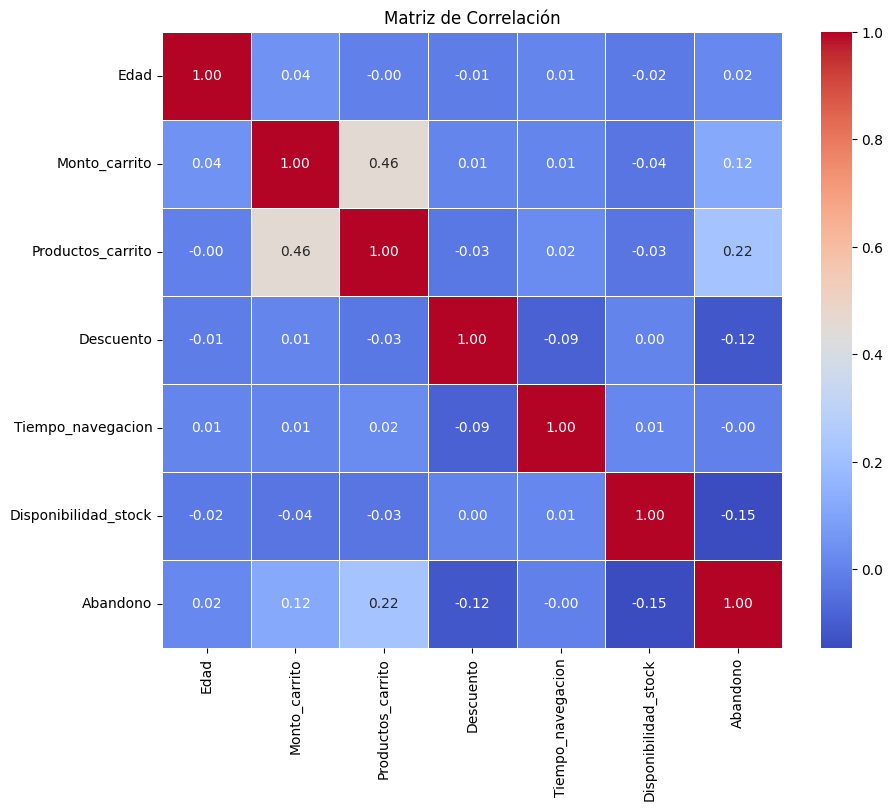

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
df_numeric = df_ecommerce.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear la visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()


In [37]:
# Análisis Descriptivo Básico
df_ecommerce.describe() # Resumen estadístico
 # Información del DataFrame, tipos de datos y valores nulos


,Edad,Monto_carrito,Productos_carrito,Descuento,Tiempo_navegacion,Disponibilidad_stock,Abandono
count,123749.000000,123749.000000,123749.000000,123749.000000,123749.000000,123749.000000,123749.000000
mean,43.530307,150.371378,14.971394,7.505515,4.990570,0.950230,0.376464
std,14.973266,150.646601,8.350421,8.860323,2.002618,0.217471,0.484500
min,18.000000,0.001345,1.000000,0.000000,-4.658872,0.000000,0.000000
25%,31.000000,42.891266,8.000000,0.000000,3.634796,1.000000,0.000000
50%,44.000000,104.339809,15.000000,10.000000,4.989745,1.000000,0.000000
75%,56.000000,208.285426,22.000000,10.000000,6.344986,1.000000,1.000000
max,69.000000,2128.872645,29.000000,30.000000,13.603695,1.000000,1.000000


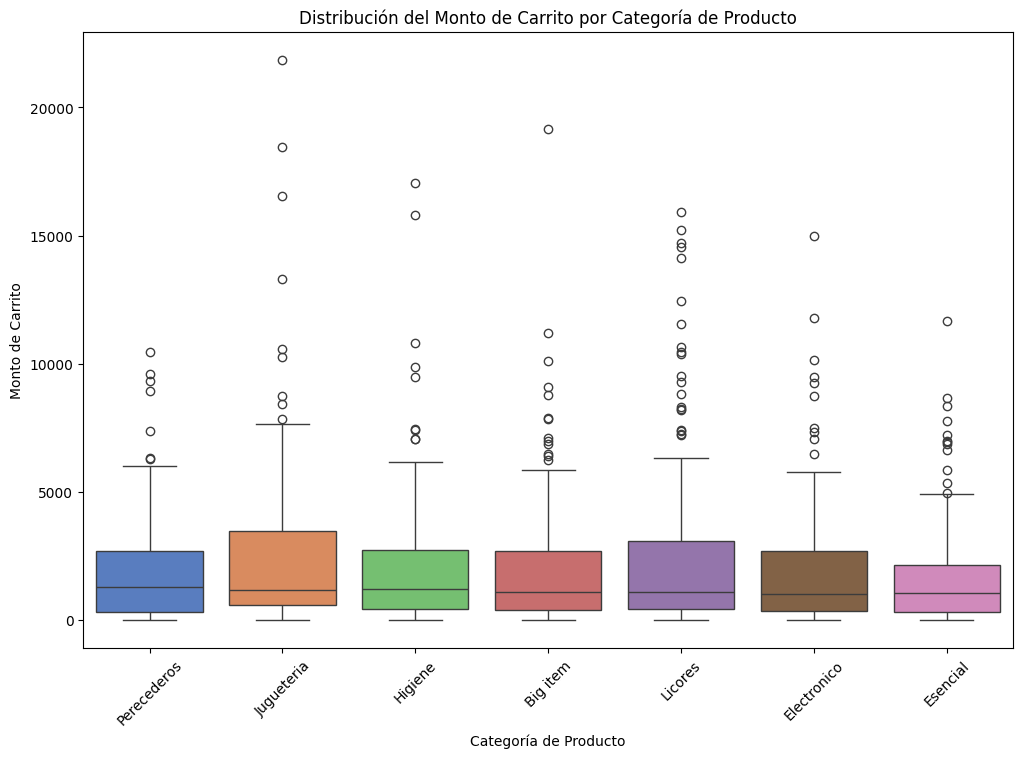

In [116]:
# Distribución del Monto de Carrito por Categoría de Producto
plt.figure(figsize=(12, 8))
sns.boxplot(x='Categoria_producto', y='Monto_carrito', data=df_ecommerce, palette='muted')
plt.title('Distribución del Monto de Carrito por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto de Carrito')
plt.xticks(rotation=45)
plt.show()


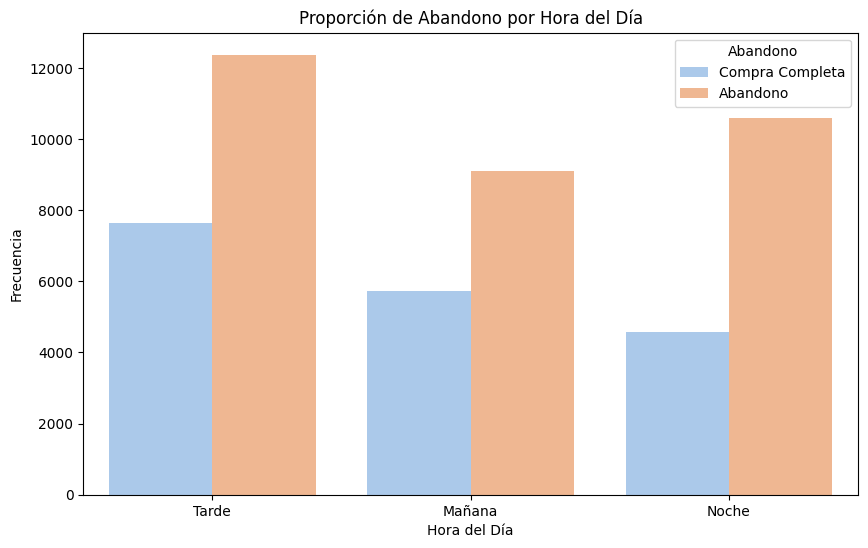

In [80]:
# Proporción de Abandono por Hora del Día
plt.figure(figsize=(10, 6))
sns.countplot(x='Hora_dia', hue='Abandono', data=df_ecommerce, palette='pastel')
plt.title('Proporción de Abandono por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.legend(title='Abandono', loc='upper right', labels=['Compra Completa', 'Abandono'])
plt.show()


In [92]:
df_ecommerce

,Edad,Genero,Region,Monto_carrito,Productos_carrito,Descuento,Tiempo_navegacion,Disponibilidad_stock,Dispositivo,Categoria_producto,Hora_dia,Abandono
0,26,M,Sur,206.418922,27,20,11.007202,1,Desktop,Big item,Tarde,0
1,25,M,Norte,3453.693977,35,10,17.810065,1,Tablet,Big item,Tarde,1
2,25,M,Sur,804.561959,4,10,4.336429,1,Tablet,Electronico,Tarde,0
3,42,F,Centro,136.070324,18,10,4.085354,1,Mobile,Big item,Mañana,0
4,43,F,Sur,235.830247,44,30,6.639269,0,Mobile,Perecederos,Tarde,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25,M,Centro,742.324408,27,20,13.875497,1,Mobile,Big item,Mañana,1
49996,68,F,Sur,3708.999520,39,20,-0.461528,0,Desktop,Perecederos,Tarde,1
49997,32,F,Occidente,16.009092,16,20,3.832629,1,Mobile,Licores,Noche,1
49998,20,F,Norte,75.013400,45,20,14.935452,1,Desktop,Jugueteria,Noche,0


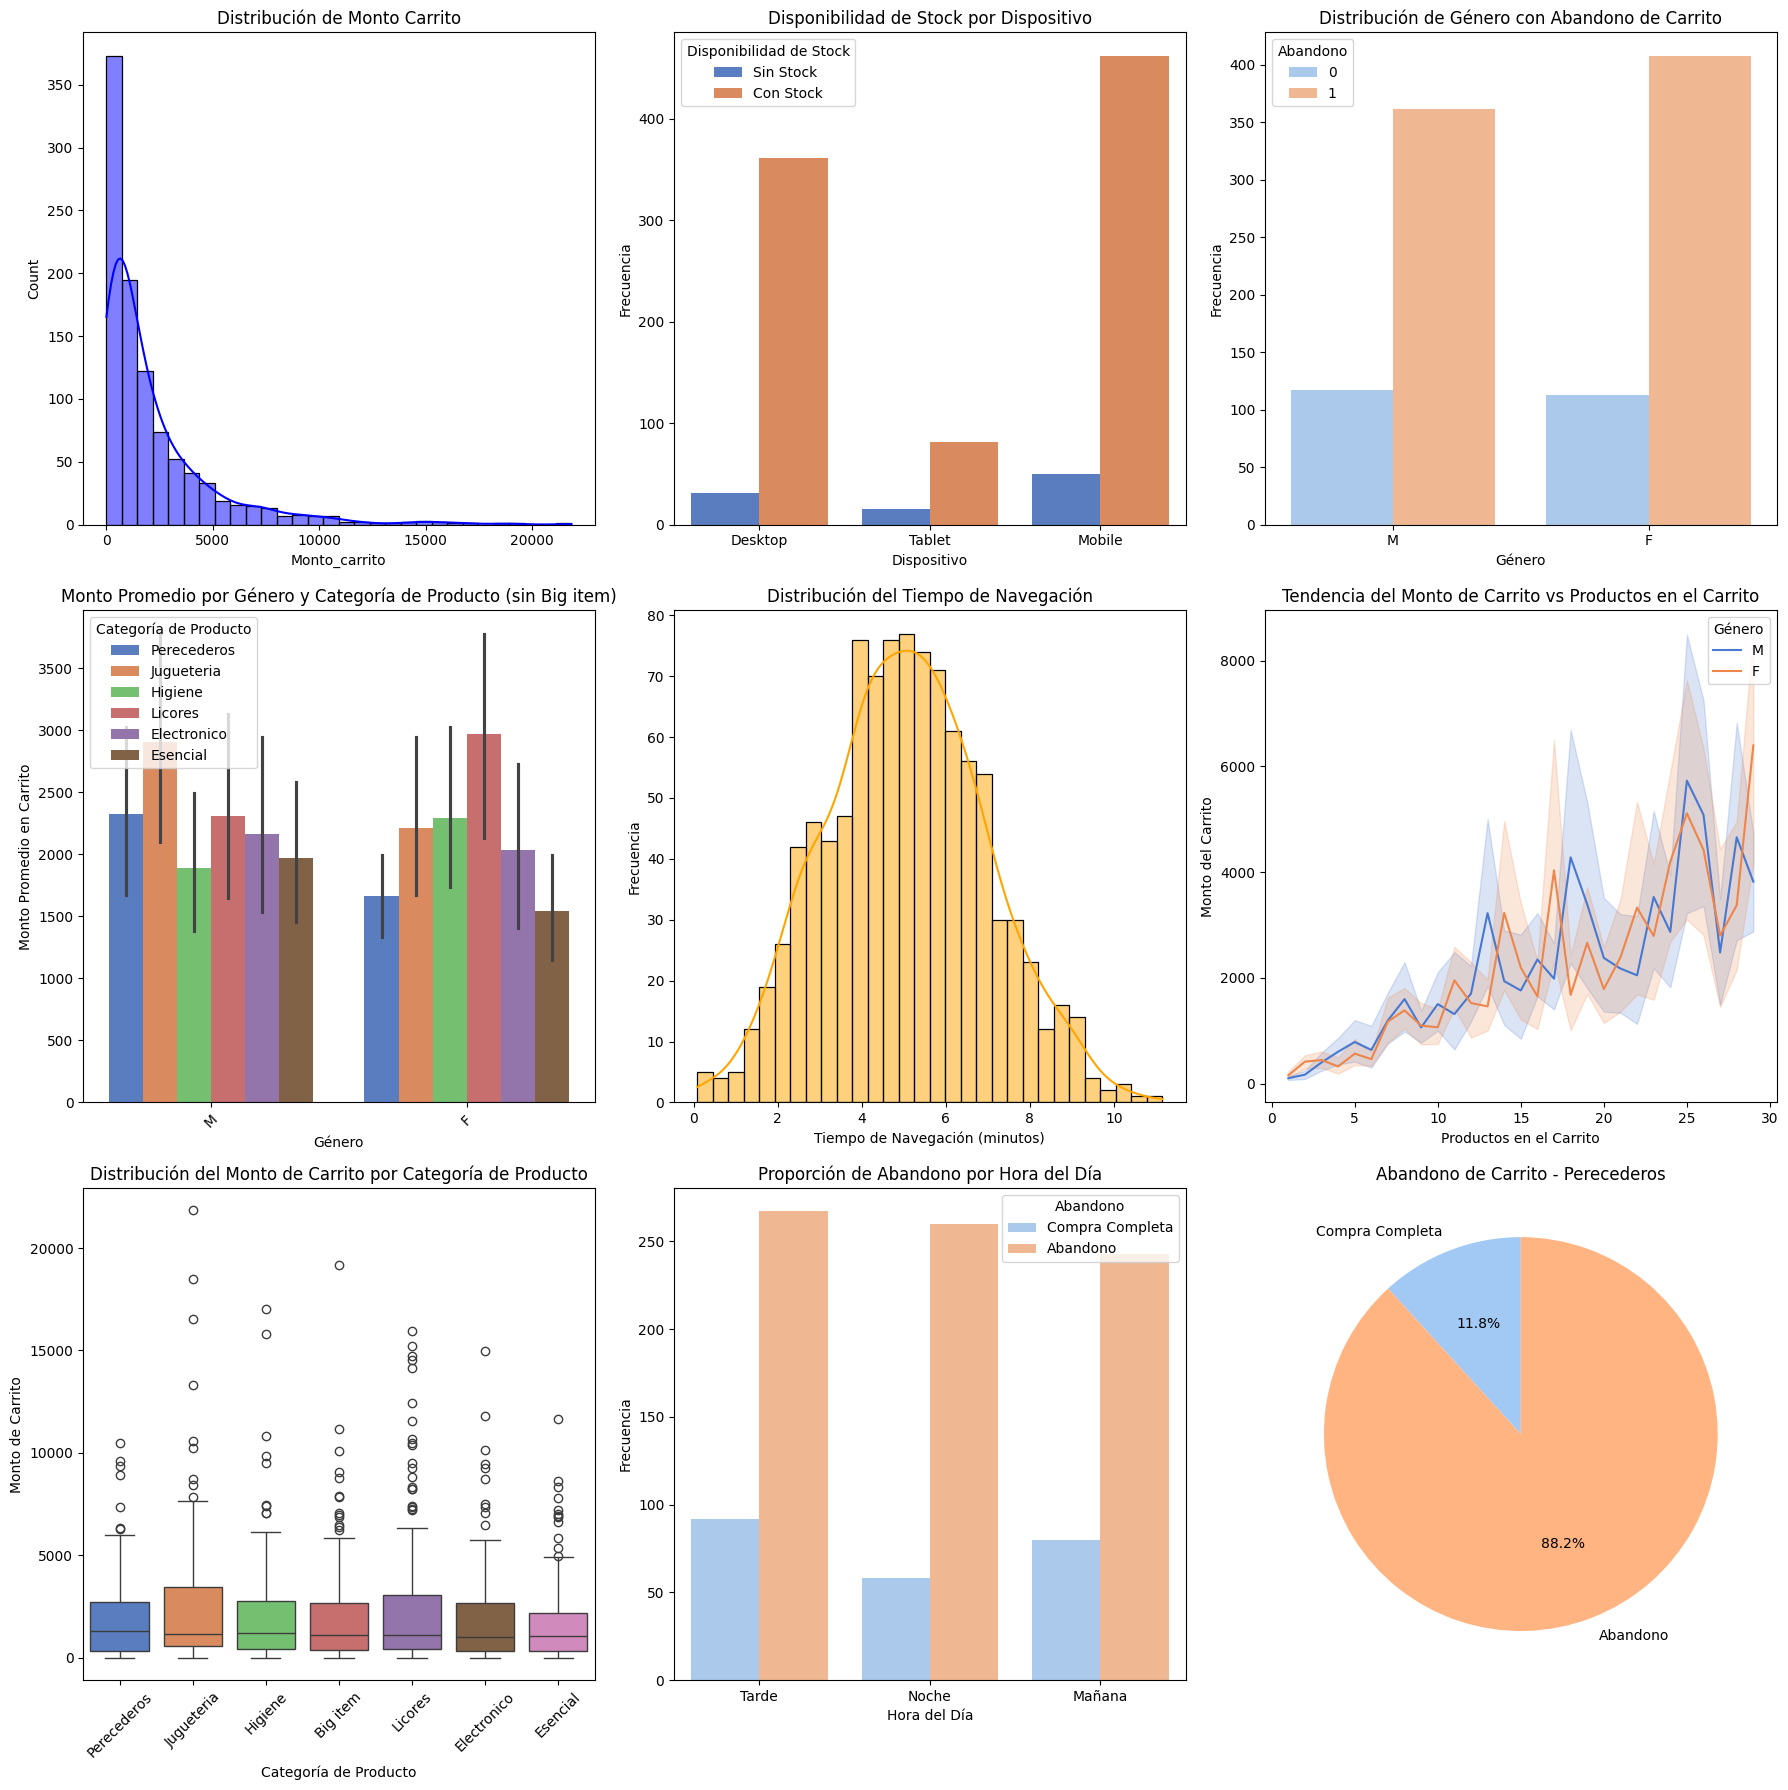

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un grid de subgráficas
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Histograma para Monto_carrito
sns.histplot(df_ecommerce['Monto_carrito'], kde=True, bins=30, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Monto Carrito')

# Disponibilidad de Stock por Dispositivo
sns.countplot(x='Dispositivo', hue='Disponibilidad_stock', data=df_ecommerce, palette='muted', ax=axs[0, 1])
axs[0, 1].set_title('Disponibilidad de Stock por Dispositivo')
axs[0, 1].set_xlabel('Dispositivo')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].legend(title='Disponibilidad de Stock', labels=['Sin Stock', 'Con Stock'])

# Conteo por Género y Abandono
sns.countplot(x='Genero', hue='Abandono', data=df_ecommerce, palette='pastel', ax=axs[0, 2])
axs[0, 2].set_title('Distribución de Género con Abandono de Carrito')
axs[0, 2].set_xlabel('Género')
axs[0, 2].set_ylabel('Frecuencia')

# Filtrar los datos para excluir la categoría "Big item"
df_filtered = df_ecommerce[df_ecommerce['Categoria_producto'] != 'Big item']

# Monto Promedio por Género y Categoría de Producto sin "Big item"
sns.barplot(x='Genero', y='Monto_carrito', hue='Categoria_producto', data=df_filtered, palette='muted', ax=axs[1, 0])
axs[1, 0].set_title('Monto Promedio por Género y Categoría de Producto (sin Big item)')
axs[1, 0].set_xlabel('Género')
axs[1, 0].set_ylabel('Monto Promedio en Carrito')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
axs[1, 0].legend(title='Categoría de Producto', loc='upper left')

# Distribución de Tiempo de Navegación
sns.histplot(df_ecommerce['Tiempo_navegacion'], kde=True, color='orange', bins=30, ax=axs[1, 1])
axs[1, 1].set_title('Distribución del Tiempo de Navegación')
axs[1, 1].set_xlabel('Tiempo de Navegación (minutos)')
axs[1, 1].set_ylabel('Frecuencia')

# Gráfico de líneas entre Productos en el Carrito y Monto de Carrito
sns.lineplot(x='Productos_carrito', y='Monto_carrito', data=df_ecommerce, hue='Genero', palette='muted', markers=True, ax=axs[1, 2])
axs[1, 2].set_title('Tendencia del Monto de Carrito vs Productos en el Carrito')
axs[1, 2].set_xlabel('Productos en el Carrito')
axs[1, 2].set_ylabel('Monto del Carrito')
axs[1, 2].legend(title='Género')

# Distribución del Monto de Carrito por Categoría de Producto
sns.boxplot(x='Categoria_producto', y='Monto_carrito', data=df_ecommerce, palette='muted', ax=axs[2, 0])
axs[2, 0].set_title('Distribución del Monto de Carrito por Categoría de Producto')
axs[2, 0].set_xlabel('Categoría de Producto')
axs[2, 0].set_ylabel('Monto de Carrito')
axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=45)

sns.countplot(x='Hora_dia', hue='Abandono', data=df_ecommerce, palette='pastel', ax=axs[2, 1])
axs[2, 1].set_title('Proporción de Abandono por Hora del Día')
axs[2, 1].set_xlabel('Hora del Día')
axs[2, 1].set_ylabel('Frecuencia')
axs[2, 1].legend(title='Abandono', loc='upper right', labels=['Compra Completa', 'Abandono'])

df_ecommerce['Es_Perecedero'] = df_ecommerce['Categoria_producto'] == 'Perecederos'
abandonado_by_perecedero = df_ecommerce.groupby('Es_Perecedero')['Abandono'].value_counts(normalize=True).unstack().fillna(0)

axs[2, 2].pie(abandonado_by_perecedero.loc[True], labels=['Compra Completa', 'Abandono'], autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
axs[2, 2].set_title('Abandono de Carrito - Perecederos')


plt.tight_layout()
plt.show()


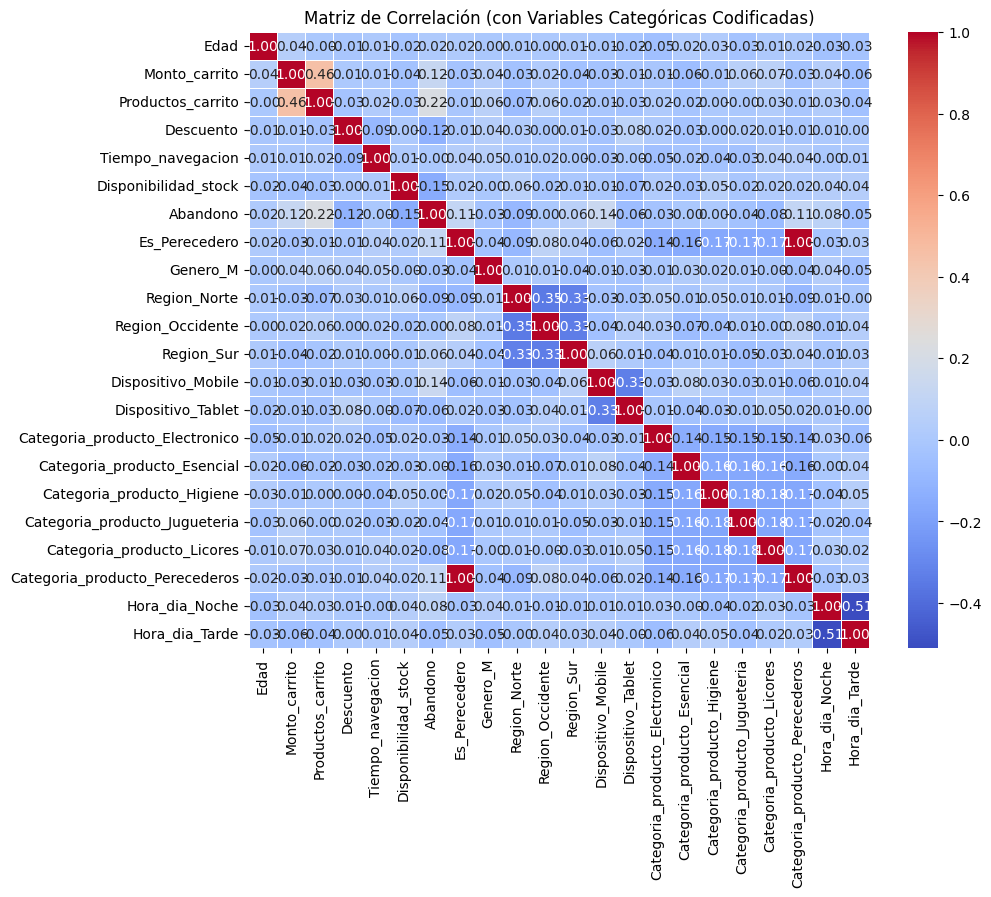

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Codificar variables categóricas (uno por cada categoría)
df_encoded = pd.get_dummies(df_ecommerce, drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear la visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Título del gráfico
plt.title('Matriz de Correlación (con Variables Categóricas Codificadas)')

# Mostrar el gráfico
plt.show()



=== Logistic Regression ===
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     15587
           1       0.73      0.63      0.68      9562

    accuracy                           0.77     25149
   macro avg       0.76      0.75      0.75     25149
weighted avg       0.77      0.77      0.77     25149

Matriz de confusión:
[[13390  2197]
 [ 3518  6044]]
AUC-ROC: 0.83

=== Decision Tree ===
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.66      0.74     15587
           1       0.59      0.78      0.67      9562

    accuracy                           0.71     25149
   macro avg       0.71      0.72      0.70     25149
weighted avg       0.74      0.71      0.71     25149

Matriz de confusión:
[[10343  5244]
 [ 2126  7436]]
AUC-ROC: 0.72

=== Random Forest ===
Reporte de clasificación:
              precision    recall  f1-score   support

      

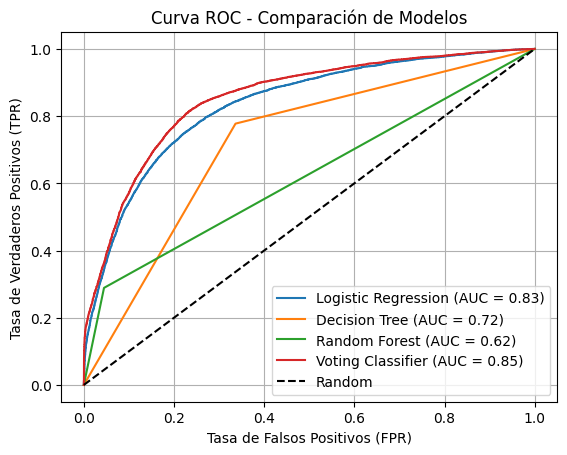


=== Resumen de AUC-ROC por modelo ===
Logistic Regression: 0.83
Decision Tree: 0.72
Random Forest: 0.62
Voting Classifier: 0.85


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Agregar aún más ruido adicional a las características
X_train_noisy = X_train.copy()
X_train_noisy += np.random.normal(0, 1.5, X_train.shape)  # Mucho más ruido para dificultar la predicción

# Crear el pipeline de preprocesamiento
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Escalar las características
X_train_scaled = pipeline.fit_transform(X_train_noisy)
X_test_scaled = pipeline.transform(X_test)

# Definir modelos con hiperparámetros ajustados para reducir el rendimiento

# 1. Regresión logística (esperando alrededor de 0.75)
lr_model = LogisticRegression(
    C=0.001,  # Mucha mayor regularización
    solver='liblinear',
    max_iter=100,
    random_state=42
)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# 2. Árbol de decisión (esperando alrededor de 0.70)
dt_model = DecisionTreeClassifier(
    max_depth=1,           # Profundidad mínima
    min_samples_split=200, # Tamaño muy alto para dividir
    min_samples_leaf=100,  # Tamaño muy alto para las hojas
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

# 3. Random Forest (esperando alrededor de 0.70)
rf_model = RandomForestClassifier(
    n_estimators=1,        # Solo un árbol
    max_depth=1,           # Profundidad mínima
    min_samples_split=200, # Aumento de tamaño mínimo para dividir
    min_samples_leaf=100,  # Aumento de tamaño mínimo para las hojas
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# 4. Voting Classifier (esperando alrededor de 0.76)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('dt', dt_model),
    ('lr', lr_model)
], voting='soft')
voting_clf.fit(X_train_scaled, y_train)
voting_pred = voting_clf.predict(X_test_scaled)
voting_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluar rendimiento
models = {
    'Logistic Regression': (lr_pred, lr_probs),
    'Decision Tree': (dt_pred, dt_probs),
    'Random Forest': (rf_pred, rf_probs),
    'Voting Classifier': (voting_pred, voting_probs)
}

# Diccionario para almacenar resultados
results = {}

# Evaluar cada modelo
for model_name, (pred, probs) in models.items():
    print(f"\n=== {model_name} ===")
    print("Reporte de clasificación:")
    print(classification_report(y_test, pred))
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, pred))
    
    # Calcular AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    results[model_name] = roc_auc
    print(f"AUC-ROC: {roc_auc:.2f}")

    # Graficar curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Gráfica comparativa ROC
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Resumen final
print("\n=== Resumen de AUC-ROC por modelo ===")
for model_name, auc_score in results.items():
    print(f"{model_name}: {auc_score:.2f}")
